In [1]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

<Axes: xlabel='x', ylabel='y'>

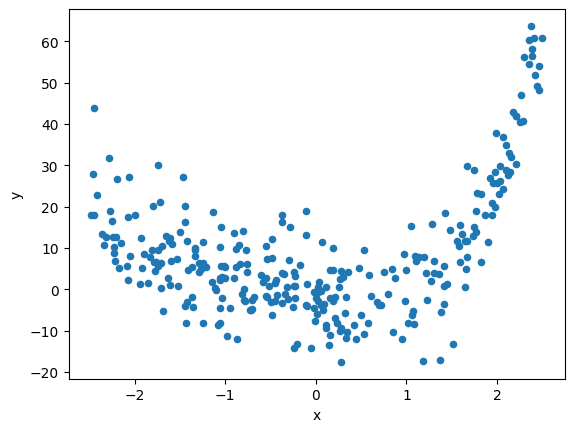

In [2]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [3]:
cancer_df_X = pd.DataFrame(data=data_breast_cancer['data'], columns=data_breast_cancer['feature_names'])
cancer_df_X = cancer_df_X[['mean texture', 'mean symmetry']]
cancer_df_y = pd.DataFrame(data=data_breast_cancer['target'], columns=['target'])

In [4]:
from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(cancer_df_X, cancer_df_y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
trees_clf = {}
for i in range(1, 11):
    trees_clf[i] = DecisionTreeClassifier(max_depth = i, random_state=42).fit(X_cancer_train, y_cancer_train)

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
trees_acc = {}
for i, clf in trees_clf.items():
    clf_predicted_train = clf.predict(X_cancer_train)
    clf_predicted_test = clf.predict(X_cancer_test)
    trees_acc[i] = (f1_score(y_cancer_train, clf_predicted_train), f1_score(y_cancer_test, clf_predicted_test))
df_acc = pd.DataFrame.from_dict(trees_acc, orient='index', columns=['train_f1', 'test_f1'])
df_acc

,train_f1,test_f1
1,0.753906,0.694915
2,0.821124,0.788732
3,0.821124,0.788732
4,0.846416,0.764706
5,0.871022,0.739726
6,0.896552,0.731034
7,0.921502,0.717241
8,0.941379,0.724638
9,0.959860,0.696296
10,0.984127,0.681481


In [7]:
best_depth_clf = trees_clf[df_acc['test_f1'].idxmax()]
best_depth_clf

DecisionTreeClassifier(max_depth=2, random_state=42)

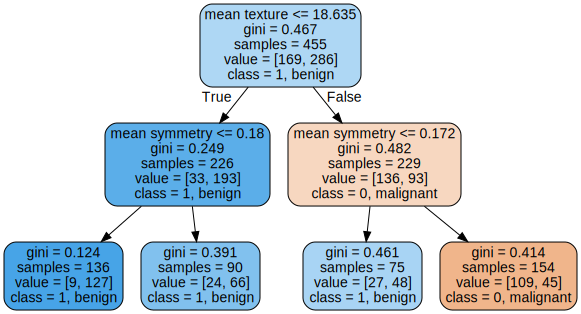

In [8]:
from sklearn.tree import export_graphviz
import graphviz
file = 'bc.png'
export_graphviz(best_depth_clf, out_file = file, feature_names = ['mean texture', 'mean symmetry'], 
                class_names=[str(num) + ', ' + name for num, name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)],
                rounded=True, filled=True)
graph = graphviz.Source.from_file(file)
graph

In [9]:
clf_predicted_train_acc = best_depth_clf.predict(X_cancer_train)
clf_predicted_test_acc = best_depth_clf.predict(X_cancer_test)
clf_accuracy_train = accuracy_score(y_cancer_train, clf_predicted_train_acc)
clf_accuracy_test = accuracy_score(y_cancer_test, clf_predicted_test_acc)

f1acc_list = [best_depth_clf.max_depth, df_acc.iloc[best_depth_clf.max_depth]['train_f1'], df_acc.iloc[best_depth_clf.max_depth]['test_f1'], 
             clf_accuracy_train, clf_accuracy_test]
f1acc_list

[2,
 0.8211243611584327,
 0.7887323943661971,
 0.7692307692307693,
 0.7368421052631579]

In [10]:
import pickle
with open('f1acc_tree.pkl', 'wb') as f1acc_pickle:
    pickle.dump(f1acc_list, f1acc_pickle)

In [11]:
df

,x,y
0,-0.545216,-1.589219
1,-1.031781,-2.119522
2,0.756196,4.219439
3,-0.049623,-14.190592
4,2.283973,40.643632
...,...,...
295,1.107091,6.795132
296,-2.462150,27.834780
297,0.990225,4.773567
298,-0.245564,-14.320655


In [12]:
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(df['x'], df['y'], test_size=0.2, random_state=42)
df_train_X = df_train_X.values.reshape(-1,1)
df_test_X = df_test_X.values.reshape(-1,1)
df_train_y = df_train_y.values.reshape(-1,1)
df_test_y = df_test_y.values.reshape(-1,1)

In [13]:
from sklearn.tree import DecisionTreeRegressor
trees_reg = {}
for i in range(1, 11):
    trees_reg[i] = DecisionTreeRegressor(max_depth = i, random_state=42).fit(df_train_X, df_train_y)

In [14]:
from sklearn.metrics import mean_squared_error
trees_acc_reg = {}
predicted_y = {}
for i, reg in trees_reg.items():
    reg_predicted_train = reg.predict(df_train_X)
    reg_predicted_test = reg.predict(df_test_X)
    trees_acc_reg[i] = (mean_squared_error(df_train_y, reg_predicted_train), mean_squared_error(df_test_y, reg_predicted_test))
df_acc = pd.DataFrame.from_dict(trees_acc_reg, orient='index', columns=['train_mse', 'test_mse'])
df_acc

,train_mse,test_mse
1,115.001507,81.052913
2,82.669538,76.370007
3,58.821605,71.381240
4,49.530839,64.495415
5,44.274973,63.697389
6,39.584300,65.426346
7,34.871451,67.090016
8,28.707638,80.391669
9,22.823338,104.482403
10,18.982828,110.971306


In [15]:
best_depth_reg = trees_reg[df_acc['test_mse'].idxmin()]
best_depth_reg

DecisionTreeRegressor(max_depth=5, random_state=42)

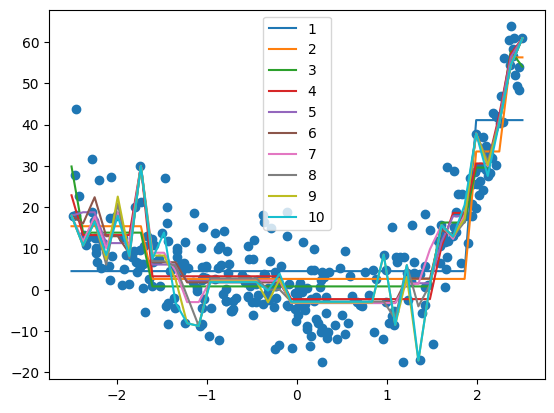

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])
for i, reg in trees_reg.items():
    temp_x = np.linspace(-2.5, 2.5, 40).reshape(-1,1)
    plt.plot(temp_x, reg.predict(temp_x), label=i)
plt.legend()

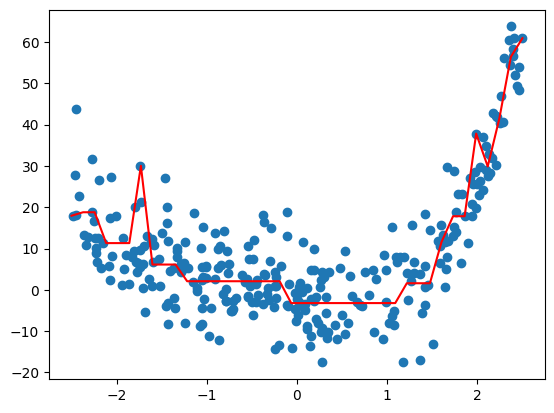

In [17]:
plt.scatter(df['x'], df['y'])
temp_x = np.linspace(-2.5, 2.5, 40).reshape(-1,1)
plt.plot(temp_x, best_depth_reg.predict(temp_x), color='red')

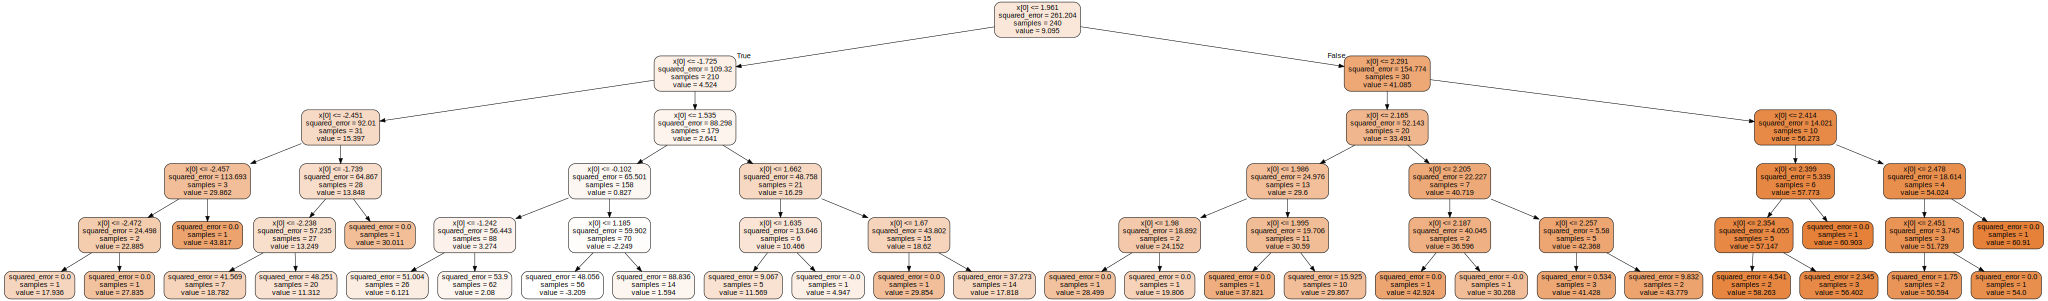

In [18]:
file_reg = 'reg.png'
export_graphviz(best_depth_reg, out_file = file_reg, rounded=True, filled=True)
graph = graphviz.Source.from_file(file_reg)
graph

In [19]:
mse_list = [best_depth_reg.max_depth, df_acc.iloc[best_depth_reg.max_depth]['train_mse'], df_acc.iloc[best_depth_reg.max_depth]['test_mse']]

In [20]:
with open('mse_tree.pkl', 'wb') as mse_pickle:
    pickle.dump(mse_list, mse_pickle)